In [1]:
run tp_knn_source.py

In [2]:
import math

# Q1

In [208]:
n = 10
mu = [1., 1.]
sigmas = [1., 1.]
rand_gauss(n, mu, sigmas)

array([[ 0.61971446, -0.24696273],
       [ 0.37160298,  0.20369757],
       [ 0.57505921,  0.78093798],
       [ 2.10217821, -1.20936378],
       [ 1.0060682 ,  0.38215138],
       [ 2.38963287,  0.24326404],
       [ 1.77781937,  0.88956721],
       [ 0.39874003,  3.32020343],
       [-0.19386494,  0.59813176],
       [ 0.78446663,  2.65236481]])

In [3]:
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

In [4]:
n1 = 50
n2 = 50
n3= 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
sigmas3 = [0.9, 0.9]
X2, y2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigmas1, sigmas2, sigmas3)

In [5]:
n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 5.
X3, y3 = rand_clown(n1, n2, sigmas1, sigmas2)

In [6]:
n1 = 150
n2 = 150
sigma = 0.1
X4, y4 = rand_checkers(n1, n2, sigma)

Ces fonctions renvoient des distributions normales.

La dernière colonne correspond au label à prédire.

# Q2

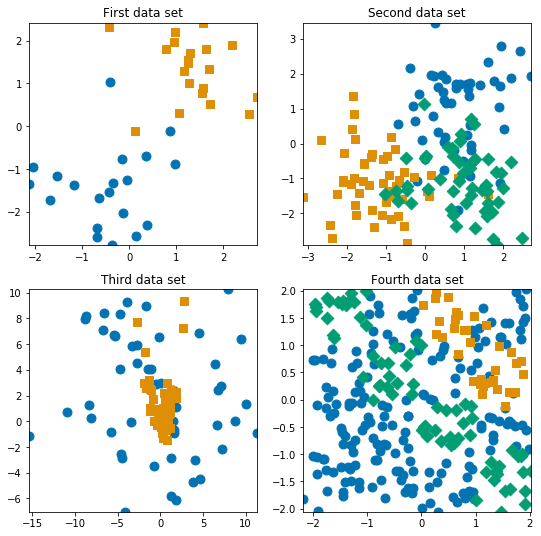

In [213]:
plt.close("all")
plt.figure(1, figsize=(9, 9))
plt.subplot(221)
plt.title('First data set')
plot_2d(X1, y1)
plt.subplot(222)
plt.title('Second data set')
plot_2d(X2, y2)
plt.subplot(223)
plt.title('Third data set')
plot_2d(X3, y3)
plt.subplot(224)
plt.title('Fourth data set')
plot_2d(X4, y4)
plt.show()

# Q3


On peut attribuer la moyenne des k plus proches voisins dans le cas d'une régression.

# Q4

In [214]:
from sklearn.base import BaseEstimator, ClassifierMixin

    
def distance(a,b):
    return np.linalg.norm(a-b)

class KNNClassifier(BaseEstimator,ClassifierMixin):
    """Home made kNN classifier class"""
    def __init__(self,n_neighbors=1):
        # Completethemehtod
        self.n_neighbors = n_neighbors
    
    def get_knn(self, x):
        distances = [distance(x, X_) for X_ in self.X]
        dist_sorted = sorted(enumerate(distances), key= lambda x : x[1])
        knn = dist_sorted[:self.n_neighbors]
        return knn
        
    def fit(self,X,y):
        #Completethemehtod
        self.X = X
        self.y = y
    
    def predict(self,X):
        #Completethemehtod
        knns = list(map(self.get_knn, X))
        labels = [[self.y[indice[0]] for indice in knn] for knn in knns]
        return [max(set(lst), key=lst.count) for lst in labels]

In [215]:
knn = KNNClassifier(n_neighbors=5)

In [216]:
knn.fit(X2[::2], y2[::2])

In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn_sk = KNeighborsClassifier(n_neighbors=5)

In [218]:
knn_sk.fit(X2[::2], y2[::2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [219]:
knn.predict(X2[1::2]) == knn_sk.predict(X2[1::2])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# Q5 

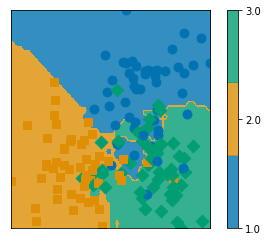

In [220]:
frontiere_new(knn_sk.predict, X2, y2)

In [221]:
knn_sk2 = KNeighborsClassifier(n_neighbors=5)

In [222]:
knn_sk2.fit(X3, y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

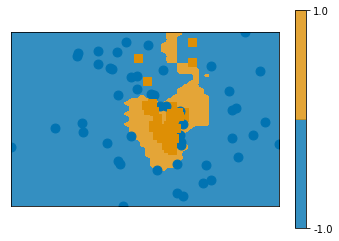

In [223]:
frontiere_new(knn_sk2.predict, X3, y3)

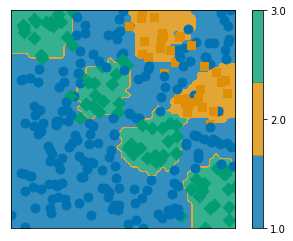

In [224]:
knn_sk4 = KNeighborsClassifier(n_neighbors=5)

knn_sk4.fit(X4, y4)

frontiere_new(knn_sk4.predict, X4, y4)

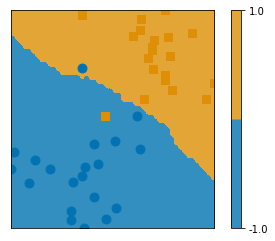

In [225]:
knn_sk1 = KNeighborsClassifier(n_neighbors=5)

knn_sk1.fit(X1, y1)

frontiere_new(knn_sk1.predict, X1, y1)

# Q6

In [226]:
n = len(y2)

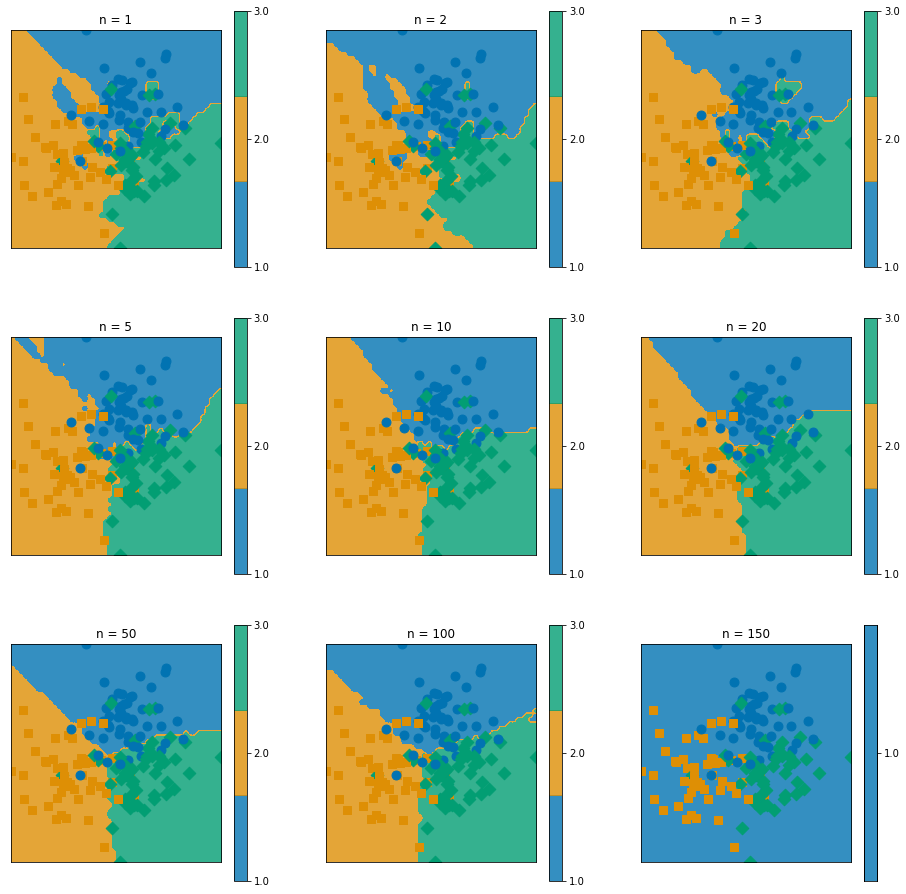

In [332]:
plt.figure(figsize=(16,16))
for i in [1,2,3,5,10,20,50, 100, n]:
    plt.subplot(331+[1,2,3,5,10,20,50, 100,n].index(i))
    knn_sk2 = KNeighborsClassifier(n_neighbors=i)
    knn_sk2.fit(X2, y2)
    plt.title("n = "+ str(i))
    frontiere_new(knn_sk2.predict, X2, y2)

# Q7

In [229]:
def weight_func(dist):
    """ Weight function to replace lambda d: d ** -2.
    The lambda function is not valid because:
    if d==0 then 0^-2 is not valid. """

    # Dist could be multidimensional, flatten it so all values
    # can be looped
    return np.exp(-(dist**2)/h)

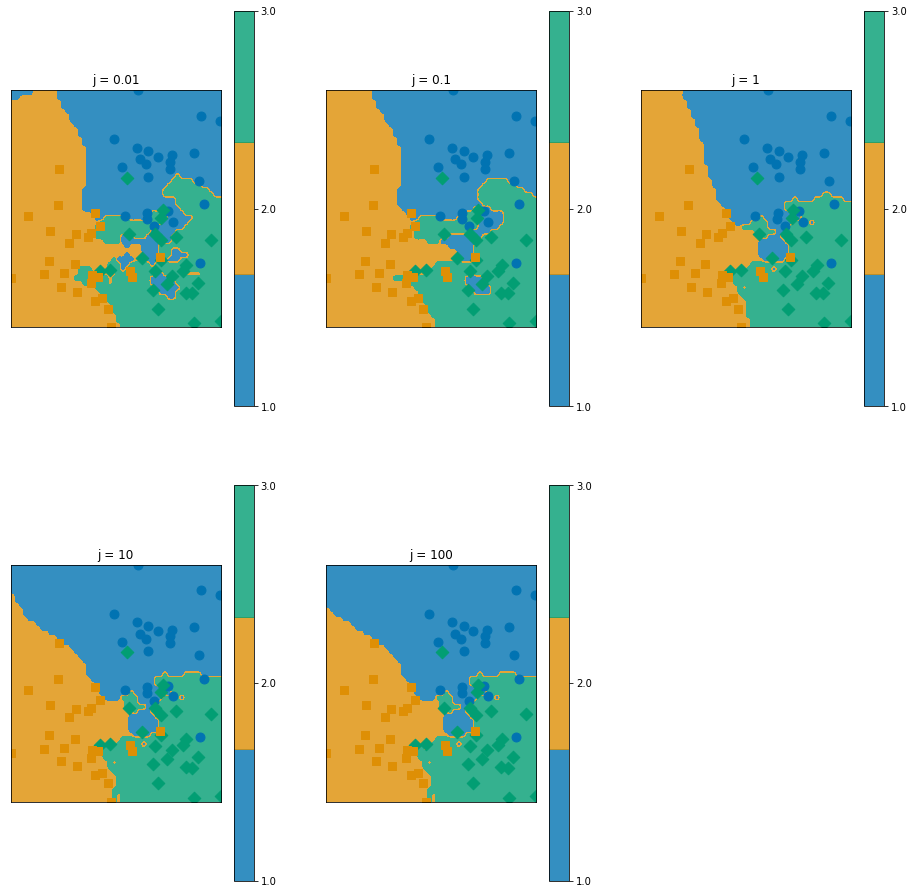

In [230]:
plt.figure(figsize=(16,16))
for i in [-2,-1,0,1,2]:
    plt.subplot(231+[-2,-1,0,1,2].index(i))
    h = 10**i
    knn_sk2 = KNeighborsClassifier(n_neighbors= 7 , weights = weight_func)
    knn_sk2.fit(X2[::2], y2[::2])
    plt.title("j = "+ str(h))
    frontiere_new(knn_sk2.predict, X2[1::2], y2[1::2])

# Q8

In [7]:
from sklearn.metrics import accuracy_score


In [355]:
knn_sk2 = KNeighborsClassifier(n_neighbors= 1)
knn_sk2.fit(X2[::2], y2[::2])
print(accuracy_score(knn_sk2.predict(X2[::2]), y2[::2]))
print(accuracy_score(knn_sk2.predict(X2[1::2]), y2[1::2]))

1.0
0.76


# Q9

In [356]:
knn_sk4 = KNeighborsClassifier(n_neighbors= 1)
knn_sk4.fit(X4[::2], y4[::2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [366]:
errorCurve = ErrorCurve(k_range=range(1,51))

In [367]:
errorCurve.fit_curve(X4[::2], y4[::2], X4[1::2], y4[1::2])

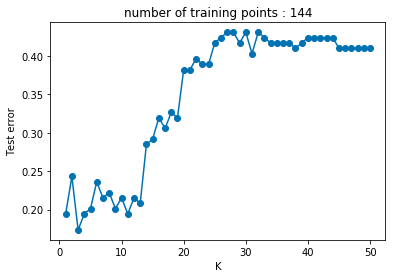

In [368]:
errorCurve.plot()


# Q10

# Q11

In [6]:
from sklearn.model_selection import train_test_split

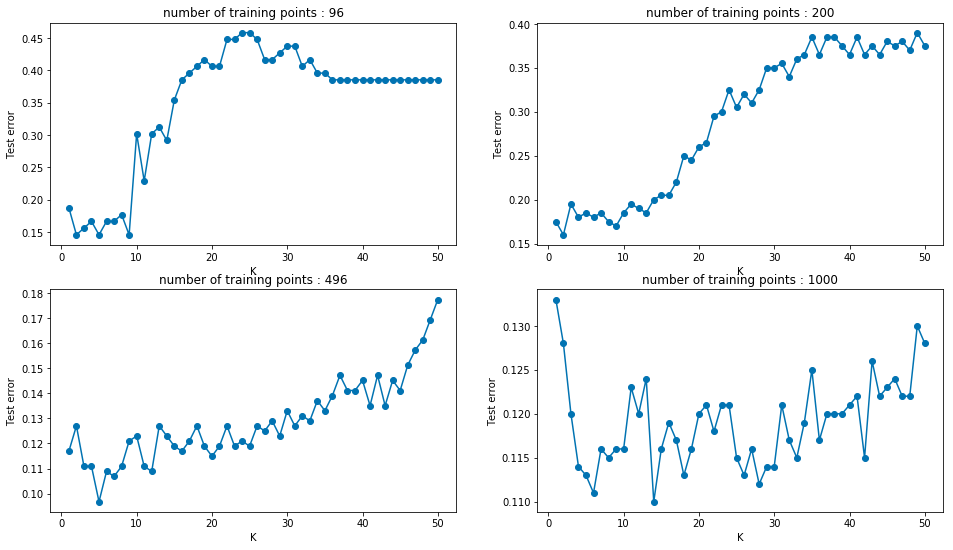

In [377]:
plt.figure(figsize=(16,9))
for n in [100, 200, 500, 1000]:
    errorCurve = ErrorCurve(k_range=range(1,51))
    sigma = 0.1
    X, y = rand_checkers(n, n, sigma)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
    errorCurve.fit_curve(X_train, y_train, X_test, y_test)
    plt.subplot(221+[100, 200, 500, 1000].index(n))
    errorCurve.plot()

In [379]:
len(X_test)

1000

In [380]:
len(rand_checkers(n, n, sigma)[0])

2000

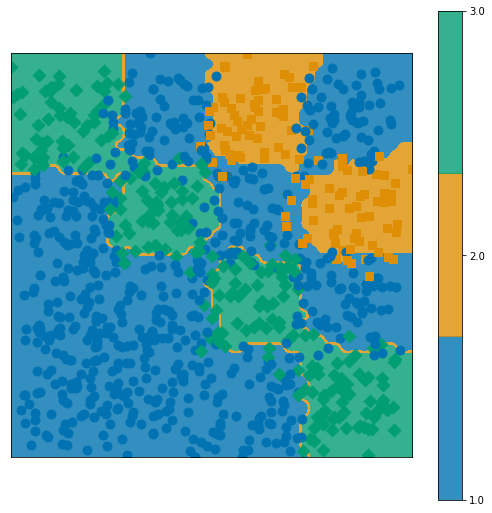

In [384]:
knn_sk4 = KNeighborsClassifier(n_neighbors= 13)
knn_sk4.fit(X_train, y_train)
plt.figure(figsize=(9,9))
frontiere_new(knn_sk4.predict, X_test, y_test)

# Q12


Recognizing hand-written digits

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00   

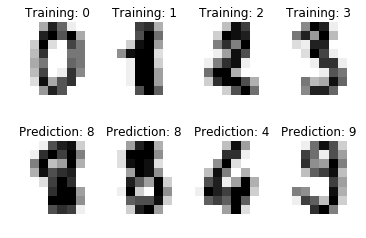

In [107]:
run plot_digits_classification.py

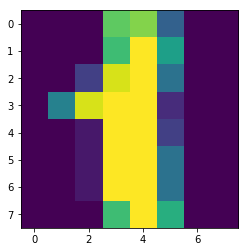

In [391]:
plt.imshow(digits['images'][1])

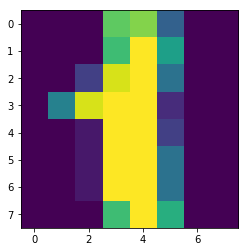

In [397]:
plt.imshow(data[1].reshape((8,8)))

In [394]:
digits['images'][1].shape

(8, 8)

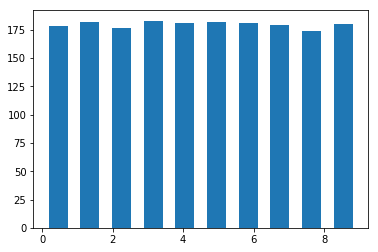

In [34]:
plt.hist(digits['target'], rwidth= 0.6);

In [402]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
knn = KNeighborsClassifier(n_neighbors=30)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, digits['target'], test_size=0.5, random_state=1)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [12]:
accuracy_score(y_test, knn.predict(X_test))

0.9388209121245829

# Q13

In [1]:
from sklearn.metrics import confusion_matrix

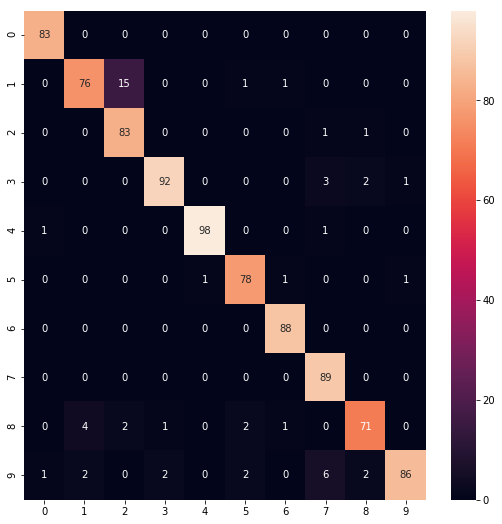

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True)

# Q14

In [18]:
errorCurve = ErrorCurve(k_range=range(1,51))
errorCurve.fit_curve(X_train, y_train, X_test, y_test)

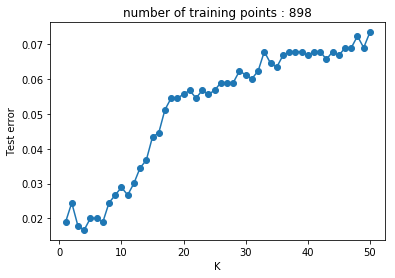

In [19]:
errorCurve.plot()

In [25]:
np.argmin(errorCurve.errors)

3

In [29]:
LooCurve = LOOCurve(k_range=[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200])
LooCurve.fit_curve(X = data, y = digits['target'])

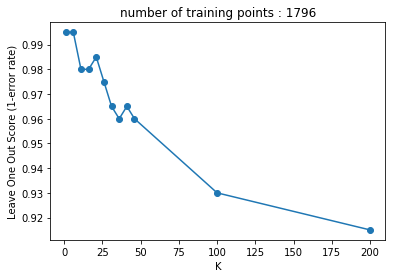

In [30]:
LooCurve.plot()

# Q15

In [23]:
%%latex
$$ P \{ Y = +1 | X = x \} = \frac {P\{X = x| Y = +1\}.P\{Y=1\}}{P\{X = x\}} $$
$$ P \{ Y = +1 | X = x \} = \frac {f_{+}.\pi_{+}}{f_{+}.\pi_{+}+f_{-}.(1-\pi_{+})} $$
$$$$$$$$
$$ P \{ Y = -1 | X = x \} = \frac {P\{X = x| Y = -1\}.P\{Y=1\}}{P\{X = x\}} $$
$$ P \{ Y = -1 | X = x \} = \frac {f_{-}.(1-\pi_{+})}{f_{+}.\pi_{+}+f_{-}.(1-\pi_{+})} $$

<IPython.core.display.Latex object>

# Q16

In [7]:
%%latex
$$\begin{align}log\left(\frac {P \{ Y = +1 | X = x \}}{ P \{ Y = -1 | X = x \}}\right)= 
log(\frac{f_{+}.\pi_{+}}{f_{-}.(1-\pi_{+})})\end{align}$$

<IPython.core.display.Latex object>

In [8]:
%%latex
\begin{align} 
log \left( \frac {P \{ Y = +1 | X = x \}}{ P \{ Y = -1 | X = x \}} \right) &=
log\left(\frac{\pi_{+}}{1-\pi_{+}}\right)\cdot\left(-\frac{1}{2}.(x − μ_{+})^T Σ^{-1}  (x − μ_{+})+\frac{1}{2}(x − μ_{-})^T Σ^{-1} (x − μ_{-}\right)\\
&=
log\left(\frac{\pi_{+}}{1-\pi_{+}}\right)\cdot\left(x^T.Σ^{-1}(μ_{+}-μ_{-})-\frac{1}{2}μ_{+}^T Σ^{-1}μ_{+}+\frac{1}{2}μ_{-}^T Σ^{-1}μ_{-}\right)\\
\end{align}

<IPython.core.display.Latex object>

# Q17

In [71]:
%%latex
On choisit le classifieur:
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & {P \{ Y = +1 | X = x \}}>{ P \{ Y = -1 | X = x \}}\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & log\left(\frac{\hat{\pi}_{+}}{1-\hat{\pi}_{+}}\right)\cdot\left(x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})-\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}+\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}\right)>0\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & log\left(\frac{\frac{m}{n}}{1-\frac{m}{n}}\right)\cdot\left(x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})-\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}+\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}\right)>0\\
-1 & sinon
\end{array}\right.
\end{equation}
$$$$
\begin{equation}
\left\lbrace
\begin{array}{c}
1 & si & 
x^T.\hat{Σ}^{-1}(\hat{μ}_{+}-\hat{μ}_{-})>
\frac{1}{2}\hat{μ}_{+}^T \hat{Σ}^{-1}\hat{μ}_{+}-\frac{1}{2}\hat{μ}_{-}^T \hat{Σ}^{-1}\hat{μ}_{-}
- log\left(\frac{m}{n}\right) + log \left({1-\frac{m}{n}}\right)\\
-1 & sinon
\end{array}\right.
\end{equation}


<IPython.core.display.Latex object>

# Q18

In [76]:
import random

In [102]:
class LDAClassifier():

    def fit(self, X, y):
        m = list(y).count(1)
        n = len(y)
        index_p = [i for i, e in enumerate(y) if e == 1]
        index_n = [i for i, e in enumerate(y) if e == -1]
        self.mu_chap_p = 1/m * \
            np.sum(np.array([X[i] for i in index_p]), axis=0).T
        self.mu_chap_n = 1 / \
            (n-m)*np.sum(np.array([X[i] for i in index_n]), axis=0).T
        X_p = np.array([X[i] for i in index_p])
        X_n = np.array([X[i] for i in index_n])
        sigma_p = 1/(m-1)*(X_p-self.mu_chap_p).T@(X_p-self.mu_chap_p)
        sigma_n = 1/(n-m-1)*(X_n-self.mu_chap_n).T@(X_n-self.mu_chap_n)
        self.sigma = 1/(n-2)*((m-1)*sigma_p+(n-m-1)*sigma_n)

        self.thresh = 1/2*(self.mu_chap_p @ np.linalg.inv(self.sigma) @self.mu_chap_p.T - self.mu_chap_n @
                           np.linalg.inv(self.sigma) @self.mu_chap_n.T) + math.log(1-m/n)-math.log(m/n)

    
    def _predict_(self, x):
        if x.T @ np.linalg.inv(self.sigma) @ (self.mu_chap_p - self.mu_chap_n) > self.thresh:
            return 1
        elif x.T @ np.linalg.inv(self.sigma) @ (self.mu_chap_p - self.mu_chap_n) < self.thresh:
            return -1
        else:
            return random.sample([-1, 1], 1)[0]
    
    def predict(self, X):
        return list(map(self._predict_, X))
    
    def score(self, X,y):
        return np.mean(self.predict(X)==y)

# Q19

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
my_LDAClassifier = LDAClassifier()

In [48]:
my_LDAClassifier.fit(X3[::2], y3[::2])

In [60]:
np.mean(my_LDAClassifier.predict(X3[1::2]) == y3[1::2])

0.72

In [51]:
sk_LDAClassifier = LinearDiscriminantAnalysis()

In [52]:
sk_LDAClassifier.fit(X3[::2], y3[::2])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [55]:
all(my_LDAClassifier.predict(X3[1::2]) == sk_LDAClassifier.predict(X3[1::2]))

True

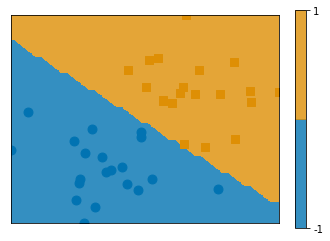

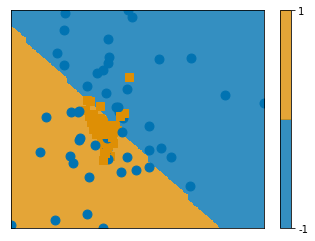

In [98]:
for X, y ,i in zip([X1,X3],[y1,y3], [0,1]):
    my_LDAClassifier = LDAClassifier()
    my_LDAClassifier.fit(X,y)
    frontiere_new(my_LDAClassifier.predict, X, y)
    plt.show()

# Q21

In [91]:
from sklearn import linear_model

In [92]:
log_reg = linear_model.LogisticRegression()

In [94]:
log_reg.fit(X3, y3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
n1 = 20
n2 = 2000
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

In [125]:
log_reg.fit(X1[::2], y1[::2])
log_reg.score(X1[1::2], y1[1::2])

0.9920792079207921

In [126]:
my_LDAClassifier.fit(X1[::2], y1[::2])
my_LDAClassifier.score(X1[1::2], y1[1::2])

0.9930693069306931

# Q22

In [105]:
log_reg.coef_

array([[-0.07055133, -0.03959577]])

In [106]:
log_reg.intercept_

array([0.13256743])

# Q23

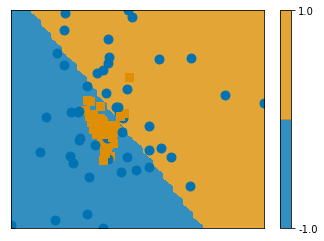

In [127]:
frontiere_new(log_reg.predict, X3, y3)

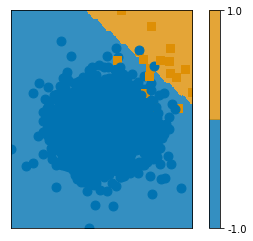

In [128]:
log_reg.fit(X1, y1)
frontiere_new(log_reg.predict, X1, y1)

# Q24

In [108]:
log_reg.fit(data[::2], digits['target'][::2])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
log_reg.score(data[1::2], digits['target'][1::2])

0.9398663697104677